## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [3]:
# Import all libraries and modules needed, then load and clean the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
# drop duplicates
df = df.drop_duplicates()
# drop rows with missing values
df = df.dropna()
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
# import and clean data
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding="latin-1")

# clean streams
df['streams'] = df['streams'].astype(str)
df['streams'] = df['streams'].str.replace(',', '')
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# clean year
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')

# drop bad rows
df = df.dropna(subset=['streams', 'released_year'])



In [17]:
df = df.sort_values('released_year')

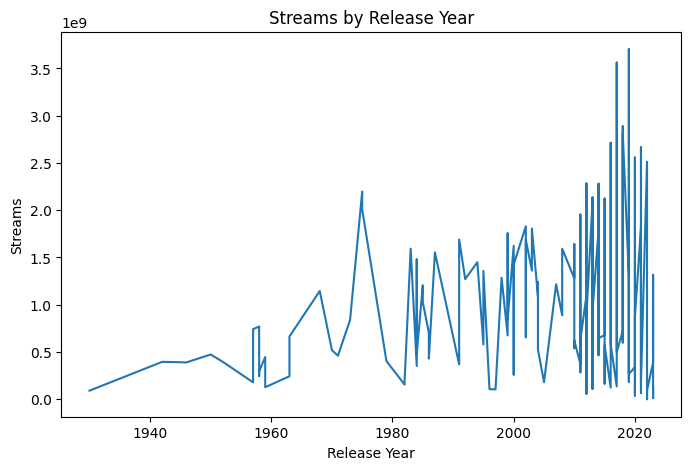

In [18]:
plt.figure(figsize=(8,5))
plt.plot(df['released_year'], df['streams'])
plt.xlabel("Release Year")
plt.ylabel("Streams")
plt.title("Streams by Release Year")
plt.show()

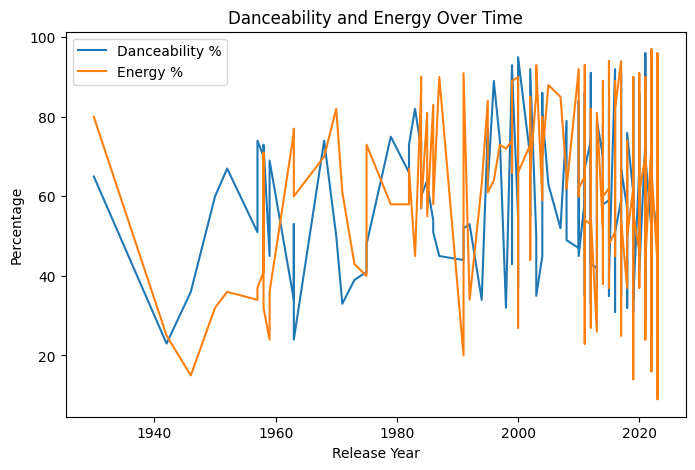

In [19]:
# Multiple Line chart 
#Compare danceability % and energy % over release year.
plt.figure(figsize=(8,5))

plt.plot(df['released_year'], df['danceability_%'], label='Danceability %')
plt.plot(df['released_year'], df['energy_%'], label='Energy %')

plt.xlabel("Release Year")
plt.ylabel("Percentage")
plt.title("Danceability and Energy Over Time")
plt.legend()
plt.show()


#### Bar Chart

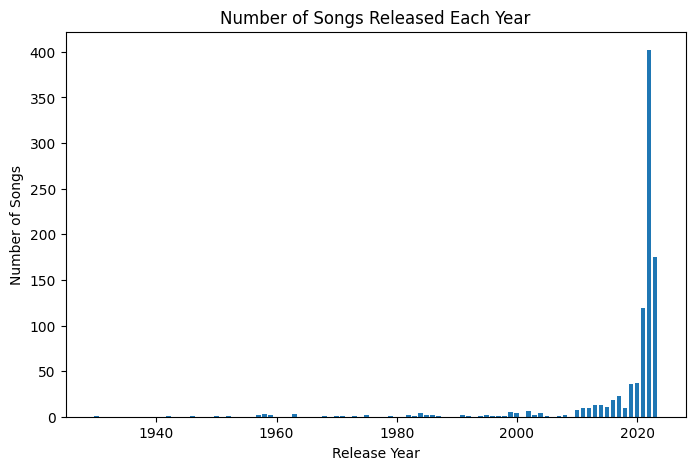

In [21]:
# Vertical bar chart
#Showing number of songs released per year.
# count songs per year
year_counts = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Released Each Year")
plt.show()




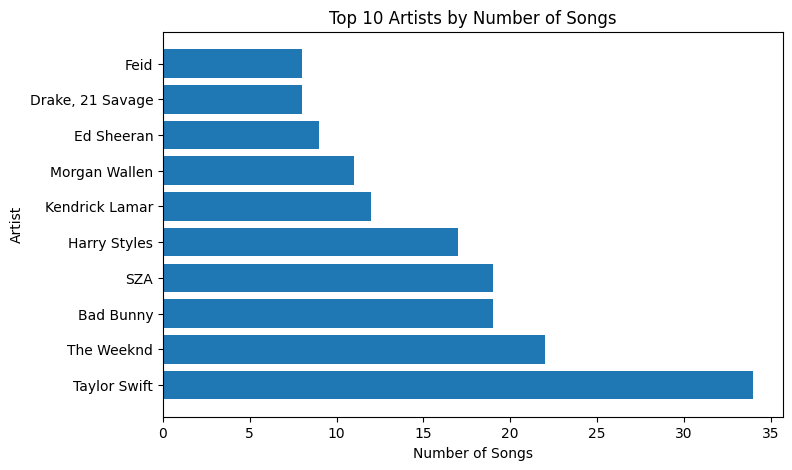

In [22]:
# Horizontal bar chart
# count songs per artist
top_artists = df['artist(s)_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_artists.index, top_artists.values)
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Number of Songs")
plt.show()

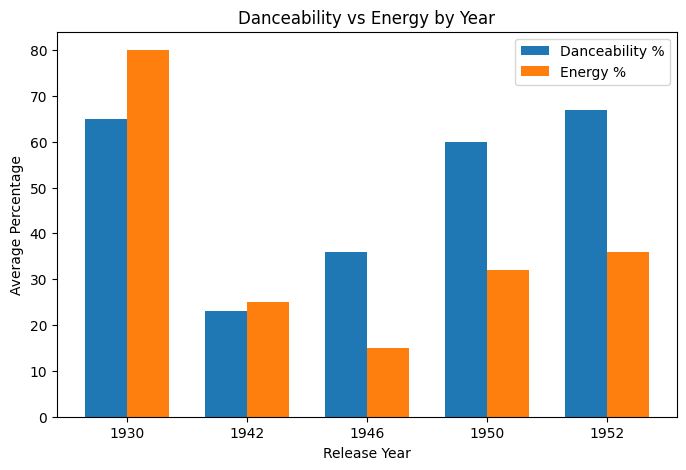

In [23]:
# Grouped bar chart
import numpy as np

# take first 5 years for simplicity
grouped = df.groupby('released_year')[['danceability_%', 'energy_%']].mean().head(5)

x = np.arange(len(grouped))  # position of each group
width = 0.35  # width of each bar

plt.figure(figsize=(8,5))
plt.bar(x - width/2, grouped['danceability_%'], width, label='Danceability %')
plt.bar(x + width/2, grouped['energy_%'], width, label='Energy %')

plt.xticks(x, grouped.index)
plt.xlabel("Release Year")
plt.ylabel("Average Percentage")
plt.title("Danceability vs Energy by Year")
plt.legend()
plt.show()


#### Scatter Plot

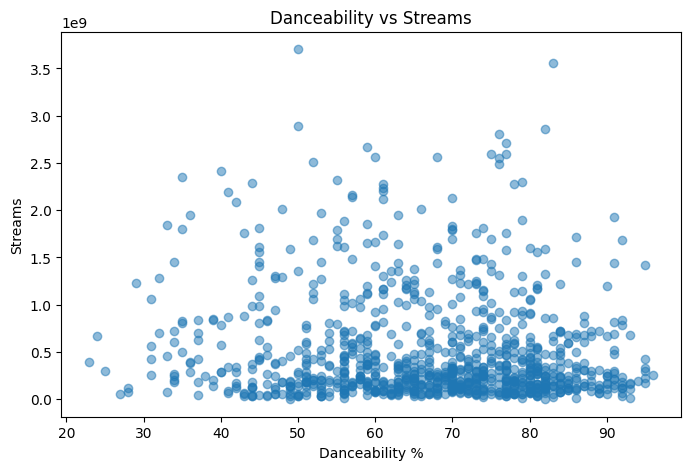

In [24]:
# scatter plot
#compare danceability % vs streams to see if more “danceable” songs get more streams.
plt.figure(figsize=(8,5))

plt.scatter(df['danceability_%'], df['streams'], alpha=0.5)

plt.xlabel("Danceability %")
plt.ylabel("Streams")
plt.title("Danceability vs Streams")
plt.show()


#### Histogram

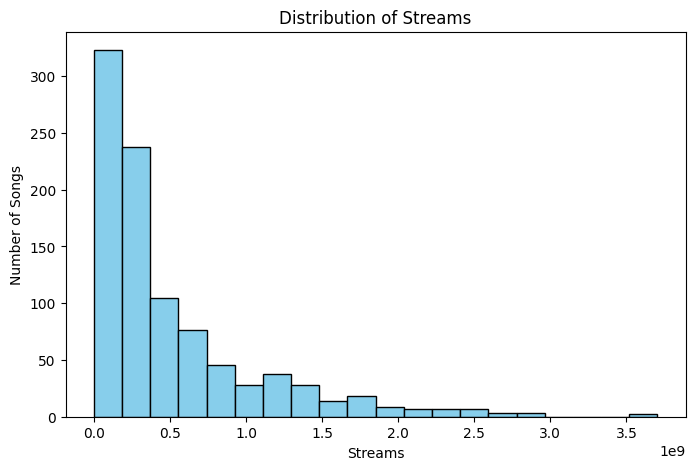

In [25]:
# histogram
plt.figure(figsize=(8,5))

plt.hist(df['streams'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Streams")
plt.ylabel("Number of Songs")
plt.title("Distribution of Streams")
plt.show()


#### Pie Chart

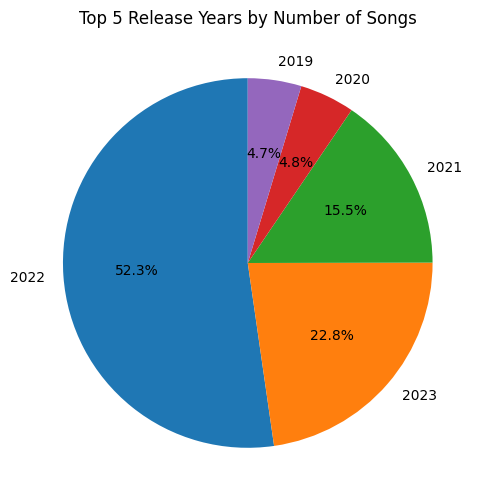

In [ ]:
# pie chart
# counting songs per year and take top 5
top_years = df['released_year'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(top_years.values, labels=top_years.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Release Years by Number of Songs")
plt.show()

